In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([[3, 1], [9, 2], [4, 7],[3,5],[5,5],[7,4],[4,8],[6,2],
              [11, 12], [13, 16], [12, 19],[14,14],[14,20],[15,16],[16,18],[11,20],
              [25,2],[28,7],[27,6],[29,4],[26,7],[26,8],[30,1],[27,8]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X) #เลือกจน. cluster
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

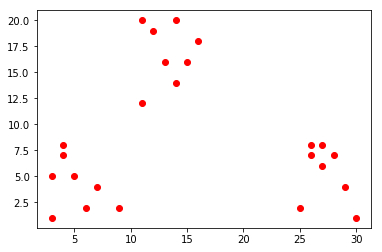

In [4]:
import matplotlib.pyplot as plt

def ArraytoCoor(H):
    x_coor = [point[0] for point in H]
    y_coor = [point[1] for point in H]
    coor=[]
    coor.append(x_coor)
    coor.append(y_coor)
    return coor

sample = ArraytoCoor(X)

plt.plot(sample[0],sample[1],'ro')
plt.show()

In [6]:
kmeans.predict([[0, 0],[20, 20],[26,9]])

array([2, 0, 1], dtype=int32)

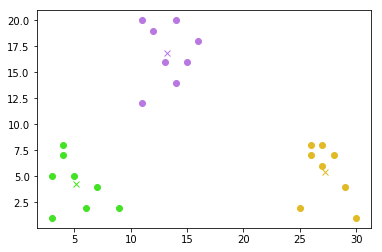

In [7]:
c = kmeans.cluster_centers_

cen = ArraytoCoor(c)
n_clus = set(kmeans.labels_)
number_clusters = len(n_clus) #number of cluster generated

#gen color for each cluster range [0]-[1] due to matplotlib color format
import random
def gencolor(number):
    color = []
    for i in range(number):
        color.append([random.randint(0, 255)/255,
                      random.randint(0, 255)/255,
                      random.randint(0, 255)/255])
    return color
color_of_clusters = gencolor(number_clusters)

#plot datapoints as o point
for i in X:
    i.tolist()
    plt.plot(i[0],i[1],'o',color=color_of_clusters[kmeans.predict([i])[0]])
#plot centroid as X point
for i in range(len(cen[0])):
    n_cen = [cen[0][i],cen[1][i]]
    plt.plot(n_cen[0],n_cen[1],'x',color=color_of_clusters[kmeans.predict([n_cen])[0]])

plt.show()

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import cv2

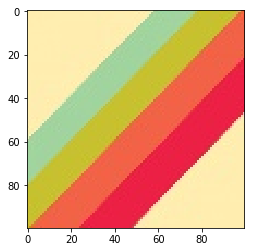

In [18]:
img = cv2.imread('colors.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

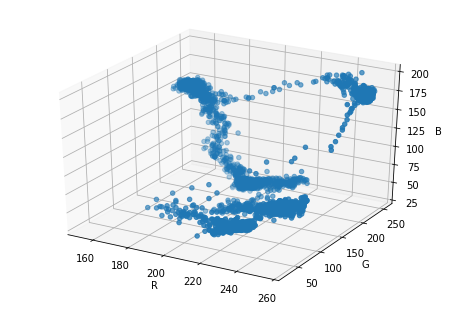

In [20]:
#read image
img = cv2.imread('colors.jpg')

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

In [47]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()

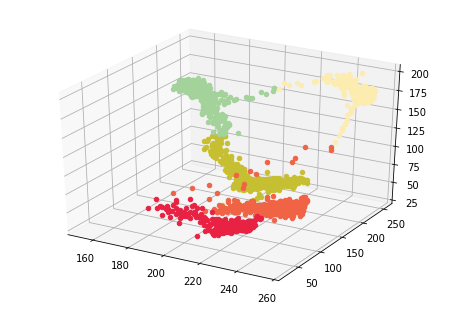

In [22]:
img = 'colors.jpg'
clusters = 5
dc = DominantColors(img, clusters)
colors = dc.dominantColors()
dc.plotClusters()

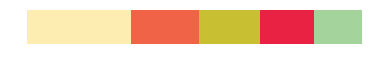

In [48]:
dc.plotHistogram()